In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#not any missing

In [5]:
print(df.corr())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

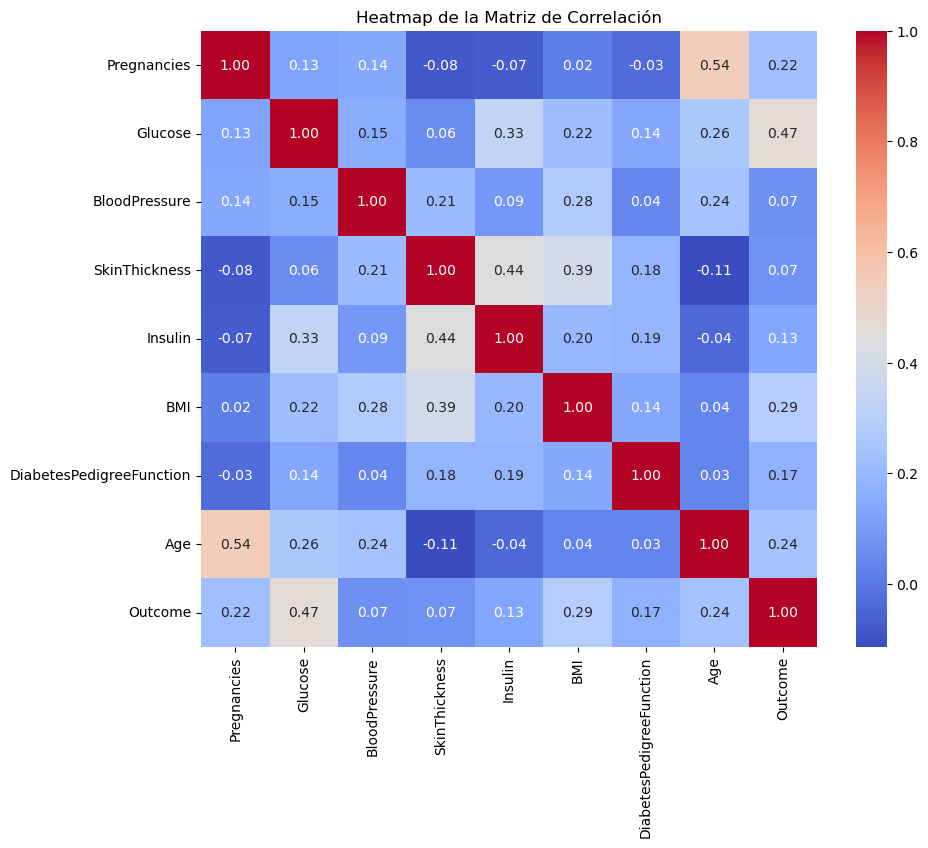

In [6]:
plt.figure(figsize=(10, 8))  # Puedes ajustar el tamaño según tus necesidades
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title('Heatmap de la Matriz de Correlación')
plt.show()

In [7]:
#We can see significant correlation between:
## Age - Pregnancies (0.54)
## Insuline - SkinThickness (0.44)
## Glucose - Outcome (objective variable) (0.47)

In [8]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)
predict_proba = model.predict_proba(X_test)
predict = model.predict(X_test)

In [10]:
accuracy_score(predict, y_test)

0.8246753246753247

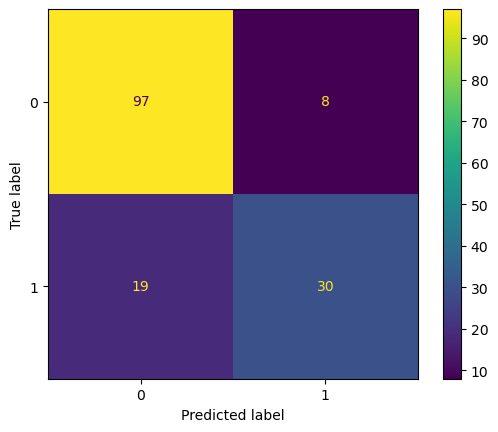

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
cfm = confusion_matrix(y_test, predict) # ()
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()

In [12]:
#Very good result in general, better accuracy at negatives (0.81) than positives (0.734)